# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
train_df.shape

(6000, 61)

In [3]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [4]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [6]:
# Entrenar con train y validar con test

In [7]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression


#          'nb': GaussianNB(),
#          'kn': KNeighborsRegressor()
models = {'logr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
         }

In [8]:
for model in models.keys():
    models[model].fit(X_train, y_train)

In [9]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
    

In [10]:
y_pred.head()

,logr,dt
1483,1,0
2185,1,0
2520,1,1
3721,1,0
3727,0,0


In [11]:
from sklearn import metrics
accur=[]
f1sco=[]
for i in range(y_pred.shape[1]):
    accur.append(metrics.accuracy_score(y_pred.iloc[:,i],y_test))
    f1sco.append(metrics.f1_score(y_pred.iloc[:,i], y_test))

In [12]:
accur#, columns=models.keys())  #accur

[0.6206666666666667, 0.5406666666666666]

In [13]:
f1sco

[0.6034843205574913, 0.541583499667332]

# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [57]:
# En 100 arboles con max_depth none
#otros 100 para 2
#otras 100 logisticas
###Generar las muestras
# set a seed for reproducibility
n_estimators = 300
np.random.seed(23)

n_samples = X_train.shape[0]
n_B = 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
#samples2 = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
#samples3 = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]


Generar los primeros 100 arboles con el dt y max_depth=None

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(100):
    trees[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(100,200):
    trees[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(200,300):
    trees[i] = LogisticRegression(random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

Generar los siguientes 100 arboles con el dt y max_depth=2

Generar 100 regresiones logisticas

Realizar la predicción de todos los modelos

In [59]:
# Predict Arboles
y_pred_df_trees = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_trees.iloc[:, i] = trees[i].predict(X_test)

y_pred_df_trees.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,0,1,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,0,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,0,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,0,1,1,0,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

Consolidar todas las predicciones

In [61]:
from sklearn import metrics
y_pred_final=(y_pred_df_trees.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
y_pred_final.head()

#y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)


metrics.f1_score(y_pred_final, y_test)

0.625086625086625

In [62]:
metrics.accuracy_score(y_pred_final, y_test)

0.6393333333333333

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [64]:
#Estimar la probabilidad con bagging
#mover el treshhold y maximizar el f1 score
#probar aprox unos 20 y hacer la grafica
threshold=[]
f1s=[]
for i in np.arange(0.1, 1, 0.05):
    y_pred_final = (y_pred_df_trees.sum(axis=1) >= (n_estimators *i)).astype(np.int)
    threshold.append((i,metrics.f1_score(y_pred_final, y_test)))
    f1s.append(metrics.f1_score(y_pred_final, y_test))

In [65]:
threshold

[(0.1, 0.6980769230769232),
 (0.15000000000000002, 0.6974248927038627),
 (0.20000000000000004, 0.6779859484777517),
 (0.25000000000000006, 0.6747279322853688),
 (0.30000000000000004, 0.6687230104873535),
 (0.3500000000000001, 0.6645728643216081),
 (0.40000000000000013, 0.6563307493540051),
 (0.45000000000000007, 0.6421404682274248),
 (0.5000000000000001, 0.6231783483691882),
 (0.5500000000000002, 0.5965166908563134),
 (0.6000000000000002, 0.5884101040118871),
 (0.6500000000000001, 0.5811320754716982),
 (0.7000000000000002, 0.5643793369313801),
 (0.7500000000000002, 0.5474683544303797),
 (0.8000000000000002, 0.5229508196721311),
 (0.8500000000000002, 0.46028880866426),
 (0.9000000000000002, 0.26550598476605003),
 (0.9500000000000003, 0.046272493573264774)]

In [66]:
pd.Series(f1s).describe()

count    18.000000
mean      0.565338
std       0.166630
min       0.046272
25%       0.551696
50%       0.609848
75%       0.667685
max       0.698077
dtype: float64

Text(0,0.5,'F1Score')

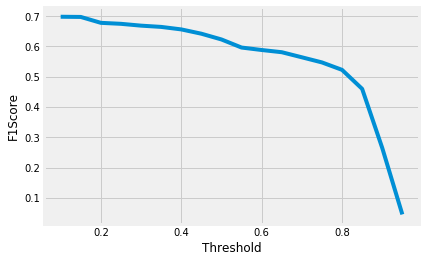

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(np.arange(0.1, 1, 0.05), f1s)
plt.xlabel('Threshold')
plt.ylabel('F1Score')

El mayor F1 se consigue cuando se utiliza 0.15 como limite para la predicción de una observación 

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [68]:
# Cambiar a weighted voting utilizar el oob
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))###Sacar las que no fueron utilizadas para entrenar

In [75]:
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5,1,'OOB error of each tree')

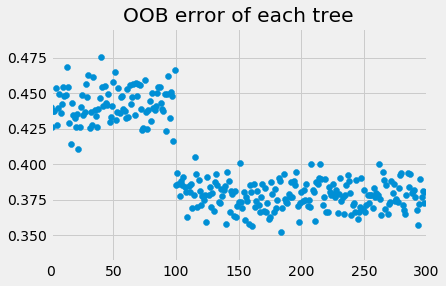

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [76]:
alpha = (1 - errors) / (1 - errors).sum()

In [78]:
weighted_sum_1 = ((y_pred_df_trees) * alpha).sum(axis=1)

In [79]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6212647671994441, 0.6366666666666667)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [80]:
threshold=[]
f1s=[]
for i in np.arange(0.1, 1, 0.05):
    y_pred = (weighted_sum_1 >= i).astype(np.int)
    threshold.append((i,metrics.f1_score(y_pred, y_test)))
    f1s.append(metrics.f1_score(y_pred, y_test))

In [81]:
threshold

[(0.1, 0.7039922103213242),
 (0.15000000000000002, 0.6943685073810826),
 (0.20000000000000004, 0.6761229314420804),
 (0.25000000000000006, 0.6711246200607902),
 (0.30000000000000004, 0.6670784434836319),
 (0.3500000000000001, 0.6645728643216081),
 (0.40000000000000013, 0.6545924967658473),
 (0.45000000000000007, 0.639892904953146),
 (0.5000000000000001, 0.6212647671994441),
 (0.5500000000000002, 0.5950653120464442),
 (0.6000000000000002, 0.5879732739420935),
 (0.6500000000000001, 0.5822021116138762),
 (0.7000000000000002, 0.5683563748079876),
 (0.7500000000000002, 0.5538945712037766),
 (0.8000000000000002, 0.5301794453507341),
 (0.8500000000000002, 0.49036777583187385),
 (0.9000000000000002, 0.3117154811715481),
 (0.9500000000000003, 0.06345177664974619)]

In [82]:
pd.Series(f1s).describe()

count    18.000000
mean      0.570901
std       0.157279
min       0.063452
25%       0.557510
50%       0.608165
75%       0.666452
max       0.703992
dtype: float64

Text(0,0.5,'F1Score')

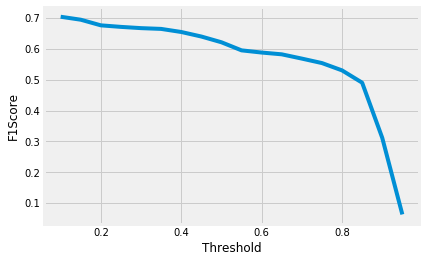

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(np.arange(0.1, 1, 0.05), f1s)
plt.xlabel('Threshold')
plt.ylabel('F1Score')

El mayor F1 se consigue cuando se utiliza 0.1 como limite para la predicción de una observación en esta modalidad, los F1 son similares a los obtenidos previamente aunque si hay un ligero aumento 

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [84]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)

In [85]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0
86,0,1,1,1,0,1,1,1,1,0,...,1,1,0,1,1,1,1,1,0,1


In [86]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [88]:
y_pred = lr.predict(y_pred_df_trees)

In [89]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6465968586387435, 0.64)

El F1 Score es inferior al obtenido a través de las otras dos metodologías en las cuales se variaba el Threshold